In [2]:
pip install imageio

  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires absl-py~=0.10, which is not installed.
tensorflow 2.5.0 requires google-pasta~=0.2, which is not installed.
tensorflow 2.5.0 requires keras-preprocessing~=1.1.2, which is not installed.
tensorflow 2.5.0 requires opt-einsum~=3.3.0, which is not installed.
tensorflow 2.5.0 requires termcolor~=1.1.0, which is not installed.
tensorflow 2.5.0 requires wrapt~=1.12.1, which is not installed.
tensorflow-gpu 2.5.0 requires absl-py~=0.10, which is not installed.
tensorflow-gpu 2.5.0 requires google-pasta~=0.2, which is not installed.
tensorflow-gpu 2.5.0 requires keras-preprocessing~=1.1.2, which is not installed.
tensorflow-gpu 2.5.0 requires opt-einsum~=3.3.0, which is not installed.
tensorflow-gpu 2.5.0 requires termcolor~=1.1.0, which is not installed.
tensorflow-gpu 2.5.0 requires wrapt~=1.12.

In [3]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

def readImg(image_path, flags=3): 
    tmp = imageio.mimread(image_path)
    if tmp is None:
        return None
    imt = np.array(tmp)
    imt = imt[0]
    if imt.ndim == 3 and flags is not -1:
        im = imt[:, :, 0:3]
    else:
        im = imt
    return im

In [31]:
class AMBTC(object):
    def __init__(self, image, m):
        self.image = image
        self.height, self.width = image.shape[:2]
        self.m = m
        self.encoding = self.decoding = None

    def encode(self):
        if self.image.ndim == 3:
            self.encode_rgb()
        else:
            self.encode_gray()

    def decode(self):
        if self.image.ndim == 3:
            self.decode_rgb()
        else:
            self.decode_gray()

    def encode_rgb(self):
        self.height, self.width = self.image.shape[:2]
        enData = []
        for i in range(0, self.height, self.m):
            enData_line = []
            for j in range(0, self.width, self.m):
                enData_dim = []
                for k in range(0, 3):
                    block = self.image[i:i+self.m, j:j+self.m, k]
                    enData_dim.append(self.encoded_block(block))
                enData_line.append(enData_dim)
            enData.append(enData_line)
        self.encoding = enData

    def encode_gray(self):
        self.height, self.width = self.image.shape[:2]
        enData = []
        for i in range(0, self.height, self.m):
            enData_line = []
            for j in range(0, self.width, self.m):
                block = self.image[i:i+self.m, j:j+self.m]
                enData_line.append(self.encoded_block(block))
            enData.append(enData_line)
        self.encoding = enData

    def decode_rgb(self):
        inputData = np.array(self.encoding)
        deData = np.zeros((self.height, self.width, 3), dtype=np.uint8)
        for i in range (0, inputData.shape[0]):
            for j in range (0, inputData.shape[1]):
                for k in range(0, 3):
                    deData[i*self.m:i*self.m+self.m, j*self.m:j*self.m+self.m, k] = self.decoded_block(inputData[i, j, k, 0], inputData[i, j, k, 1], inputData[i, j, k, 2])
        
        self.decoding = deData

    def decode_gray(self):
        inputData = np.array(self.encoding)
        self.height, self.width = inputData[:, :, 2][0, :].shape[0]*self.m,inputData[:, :, 2][:, 0].shape[0]*self.m
        deData = np.zeros((self.height, self.width), dtype=np.uint8)
        for i in range (0, inputData.shape[0]):
            for j in range (0, inputData.shape[1]):
                deData[i*self.m:i*self.m+self.m, j*self.m:j*self.m+self.m] = self.decoded_block(inputData[i, j, 0], inputData[i, j, 1], inputData[i, j, 2])
        
        self.decoding = deData

    def encoded_block(self, block):
        Ii = np.average(block)
        Bi = np.array(block > Ii, dtype=np.bool)
        ai = np.around(np.mean((Bi*block)[Bi > 0]))
        bi = np.around(np.mean((~Bi*block)[Bi <= 0]))
        return ai if ai is np.nan else bi, bi, Bi

    def decoded_block(self, ai, bi, Bi):
        return ai*Bi + bi*(~Bi)


C:\Users\BREND\miniconda3\envs\tf_2.5\lib\site-packages\ipykernel_launcher.py:71: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\BREND\miniconda3\envs\tf_2.5\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\BREND\miniconda3\envs\tf_2.5\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\BREND\miniconda3\envs\tf_2.5\lib\site-packages\ipykernel_launcher.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'tuple'> (256, 256, 3, 3)
<class 'tuple'> (128, 128, 3, 3)


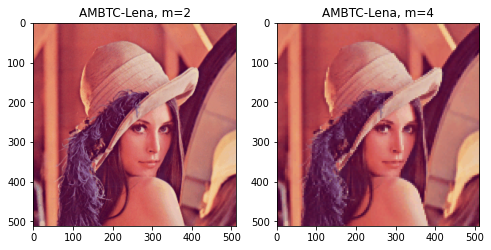

In [30]:
Image = readImg("../../_Image Data/Lenna/lena_color.gif")
# Image.shape

ambtc1 = AMBTC(Image, 2)
ambtc1.encode()
ambtc1.decode()
ambtc2 = AMBTC(Image, 4)
ambtc2.encode()
ambtc2.decode()

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(ambtc1.decoding)
axs[0].set_title('AMBTC-Lena, m=2')
axs[1].imshow(ambtc2.decoding)
axs[1].set_title('AMBTC-Lena, m=4')
plt.show()